<a href="https://colab.research.google.com/github/oanlargu/Python/blob/master/ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)

In [ ]:
pip install -U scikit-learn

# Data Gathering

In [32]:
df = pd.read_csv("car_dataset.csv")
df.sample(20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
289,city,2016,10.11,13.60,10980,Petrol,Dealer,Manual,0
49,ciaz,2017,7.75,9.29,37000,Petrol,Dealer,Automatic,0
157,Yamaha FZ S V 2.0,2015,0.48,0.84,23000,Petrol,Individual,Manual,0
14,dzire,2009,2.25,7.21,77427,Petrol,Dealer,Manual,0
57,corolla altis,2010,4.75,18.54,50000,Petrol,Dealer,Manual,0
225,i10,2011,2.70,4.60,22517,Petrol,Dealer,Manual,0
268,brio,2017,4.80,5.80,19000,Petrol,Dealer,Manual,0
204,eon,2015,2.75,4.43,28282,Petrol,Dealer,Manual,0
257,city,2015,8.50,13.60,40324,Petrol,Dealer,Manual,0
213,i20,2011,2.90,6.79,31604,Petrol,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [8]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [9]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [10]:
df['Owner'].unique()

array([0, 1, 3])

In [59]:
df['Car_Name'].value_counts()

city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
vitara brezza          1
UM Renegade Mojave     1
land cruiser           1
Hero Glamour           1
omni                   1
Name: Car_Name, Length: 98, dtype: int64

# Data Preparation

In [33]:
df0 = df

In [34]:
df["Age"] = 2021 - df["Year"]

In [35]:
df = df.drop(columns="Year")

In [36]:
df.sample(10)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
128,Honda CB Hornet 160R,0.80,0.87,3000,Petrol,Individual,Manual,0,4
23,alto k10,2.50,3.46,45280,Petrol,Dealer,Manual,0,7
249,i20,5.25,7.60,17000,Petrol,Dealer,Manual,0,5
293,city,3.25,9.90,38000,Petrol,Dealer,Manual,0,11
31,ritz,2.35,4.89,54200,Petrol,Dealer,Manual,0,10
251,city,5.00,9.90,56701,Petrol,Dealer,Manual,0,8
90,corolla altis,3.80,18.61,62000,Petrol,Dealer,Manual,0,12
167,TVS Apache RTR 160,0.42,0.81,42000,Petrol,Individual,Manual,0,7
165,Activa 3g,0.45,0.54,500,Petrol,Individual,Automatic,0,5
280,brio,5.25,5.90,14465,Petrol,Dealer,Manual,0,6


# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [38]:
df = df.join(df['Fuel_Type'].str.get_dummies().add_prefix("Fuel_type_"))

In [40]:
df = df.join(df['Transmission'].str.get_dummies().add_prefix("Transmission_"))

In [41]:
df = df.join(df['Seller_Type'].str.get_dummies().add_prefix("Seller_Type_"))

In [43]:
df.drop(["Fuel_Type", "Transmission", "Seller_Type"], axis=1, inplace=True)

In [63]:
df1 = df.join(df['Car_Name'].str.get_dummies().add_prefix("Car_Name_"))

In [64]:
df1 = df1.drop(columns="Car_Name")

In [68]:
df1

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_type_CNG,Fuel_type_Diesel,Fuel_type_Petrol,Transmission_Automatic,Transmission_Manual,Seller_Type_Dealer,Seller_Type_Individual,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,Car_Name_Bajaj Avenger 220 dtsi,Car_Name_Bajaj Avenger Street 220,Car_Name_Bajaj Discover 100,Car_Name_Bajaj Discover 125,Car_Name_Bajaj Dominar 400,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar 135 LS,Car_Name_Bajaj Pulsar 150,Car_Name_Bajaj Pulsar 220 F,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar RS200,Car_Name_Hero CBZ Xtreme,Car_Name_Hero Ignitor Disc,Car_Name_Hero Extreme,Car_Name_Hero Glamour,Car_Name_Hero Honda CBZ extreme,Car_Name_Hero Honda Passion Pro,Car_Name_Hero Hunk,Car_Name_Hero Passion Pro,Car_Name_Hero Passion X pro,Car_Name_Hero Splender Plus,...,Car_Name_Yamaha FZ 16,Car_Name_Yamaha FZ S,Car_Name_Yamaha FZ S V 2.0,Car_Name_Yamaha Fazer,Car_Name_alto 800,Car_Name_alto k10,Car_Name_amaze,Car_Name_baleno,Car_Name_brio,Car_Name_camry,Car_Name_ciaz,Car_Name_city,Car_Name_corolla,Car_Name_corolla altis,Car_Name_creta,Car_Name_dzire,Car_Name_elantra,Car_Name_eon,Car_Name_ertiga,Car_Name_etios cross,Car_Name_etios g,Car_Name_etios gd,Car_Name_etios liva,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i10,Car_Name_i20,Car_Name_ignis,Car_Name_innova,Car_Name_jazz,Car_Name_land cruiser,Car_Name_omni,Car_Name_ritz,Car_Name_s cross,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent
0,3.35,5.59,27000,0,7,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,4.75,9.54,43000,0,8,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,7.25,9.85,6900,0,4,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.85,4.15,5200,0,10,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4.60,6.87,42450,0,7,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
297,4.00,5.90,60000,0,6,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
298,3.35,11.00,87934,0,12,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
299,11.50,12.50,9000,0,4,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


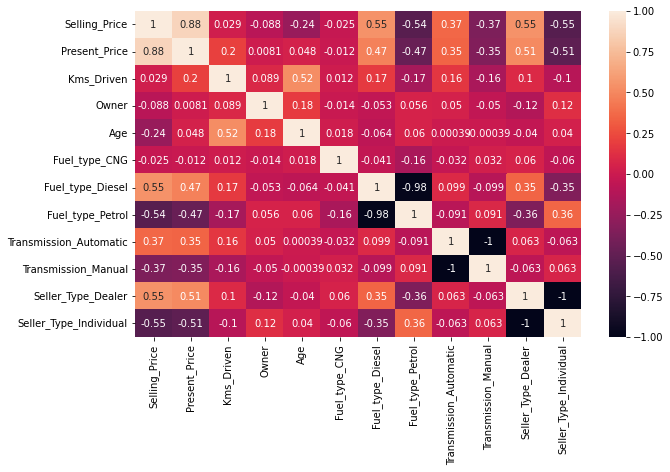

In [70]:
sns.heatmap(df.corr(), annot=True)

In [61]:
def distribution_check (df1, var):
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=df)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()

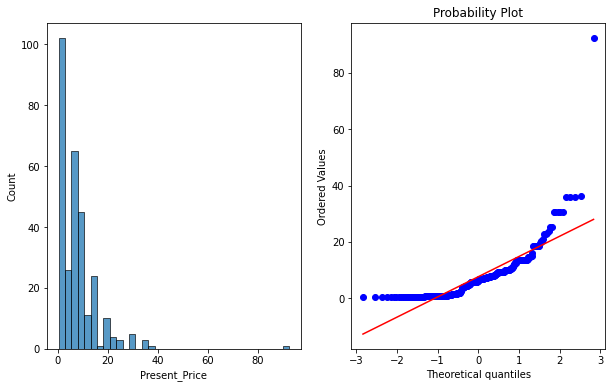

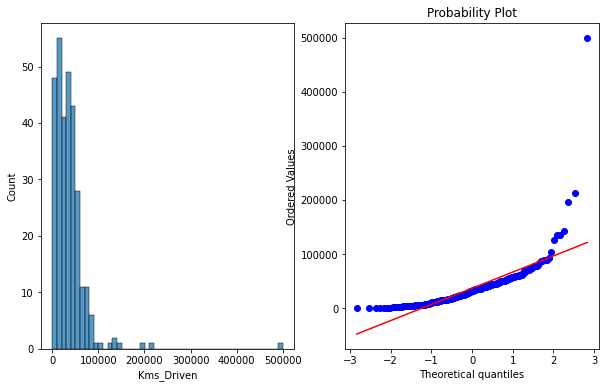

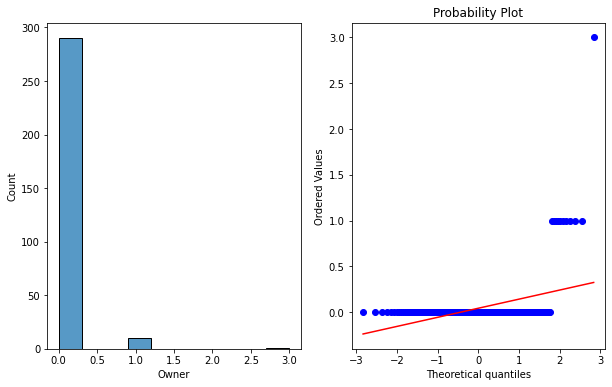

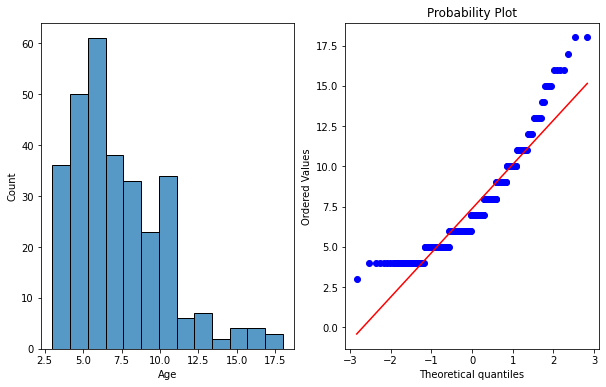

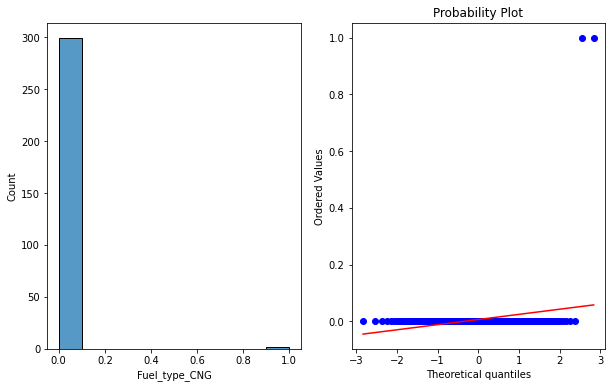

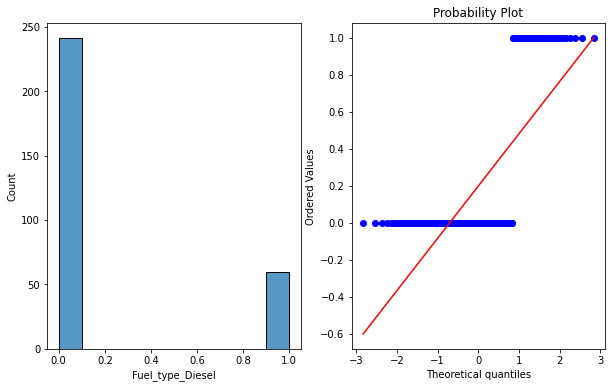

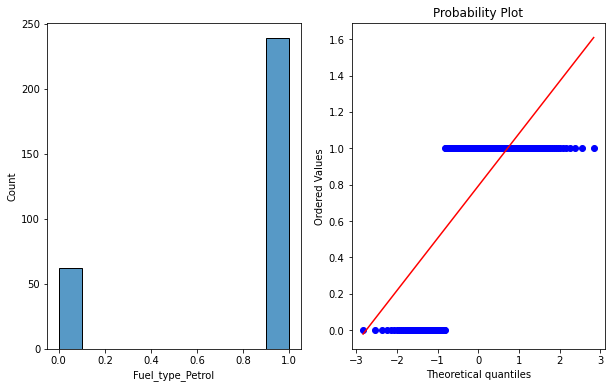

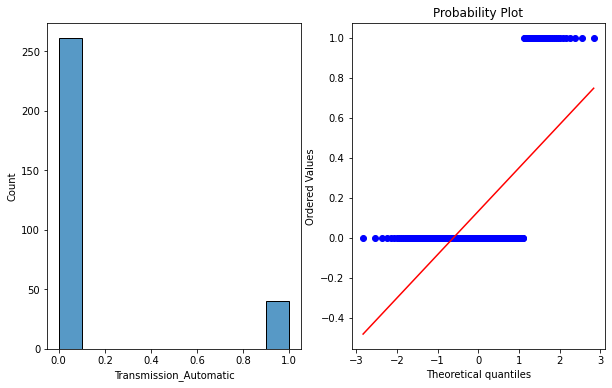

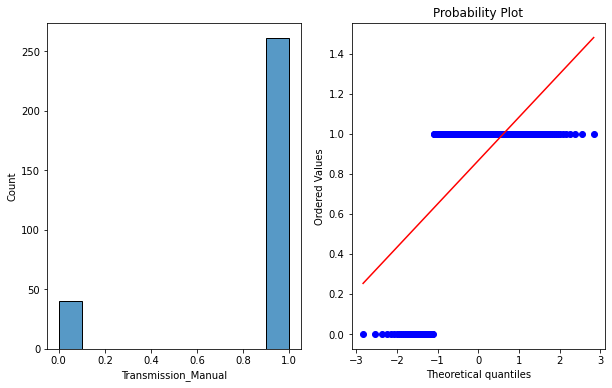

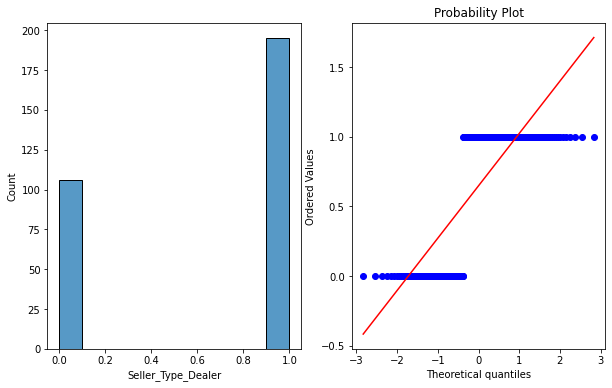

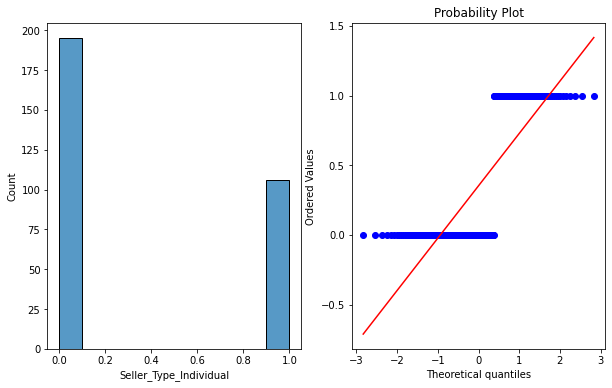

ValueError: ignored

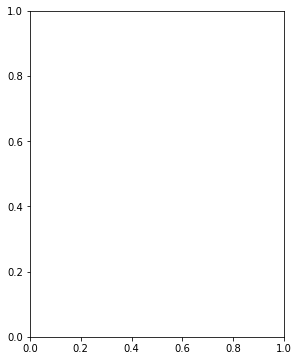

In [71]:
for col in df1.drop("Selling_Price", axis=1).columns:
  distribution_check (df, col)

### Splitting data into training and testing

In [81]:
X = df1.drop(columns="Selling_Price")
y = df['Selling_Price']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)

X_train shape :  (210, 109)
X_test shape :  (91, 109)


##  Model Building (Linear Regression)

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
model = LinearRegression()

In [91]:
model.fit(X_train, y_train)

LinearRegression()

In [94]:
y_pred = model.predict(X_test)
y_pred

array([ 1.61528662e+00,  9.88634349e+00,  5.63738064e+00, -4.93185212e-01,
        8.71969707e+00,  6.71553664e+00,  1.65203829e+00,  8.85509207e-01,
        8.52817908e-01,  6.83616526e+00,  1.00093793e+01,  5.78145361e-01,
        8.28907504e+00,  2.57601891e+00,  6.45074951e+00,  2.28113213e+00,
        2.94350054e+00,  1.13022021e+01,  2.01579767e+00,  2.99354251e+00,
        2.42245895e-01,  8.03925761e+00,  6.30266927e+00,  2.35364769e+00,
        5.46037010e-01,  3.63628112e+00,  5.10287719e+00,  1.89946086e+00,
        2.91822506e+00,  2.79181268e+00,  7.31453613e-02,  8.97825770e+00,
       -1.91407154e+00,  2.09000754e+00,  8.31794603e+00,  4.12786360e+00,
        5.47992550e+00,  6.37964140e+00,  3.39504967e+00,  7.07689412e+00,
        5.63671814e+00,  1.46239756e+00,  4.13525736e+00, -2.40785983e-01,
        7.13022079e+00, -7.13011671e-03,  8.28013313e+00,  9.45634159e+00,
        3.77629938e+00,  4.22096198e+00,  6.06945549e+00,  3.08407850e+00,
        2.35885366e+01,  

In [95]:
my_dict = {"Actual" : y_test, "pred" : y_pred, "residual" : y_test - y_pred}
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
177,0.35,1.615287,-1.265287
289,10.11,9.886343,0.223657
228,4.95,5.637381,-0.687381
198,0.15,-0.493185,0.643185
60,6.95,8.719697,-1.769697
...,...,...,...
119,1.05,0.367469,0.682531
19,2.65,3.915428,-1.265428
181,0.30,0.530140,-0.230140
79,14.50,17.857228,-3.357228


# Interpret the model

In [97]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [100]:
y_train_pred = model.predict(X_train)

In [104]:
model_scores = {"model_train": {"R2" : r2_score(y_train, y_train_pred),
                                "mae" : mean_absolute_error(y_train, y_train_pred),
                                "mse" : mean_squared_error(y_train, y_train_pred),
                                "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
                "model_test": {"R2" : r2_score(y_test, y_pred),
                               "mae" : mean_absolute_error(y_test, y_pred),
                               "mse" : mean_squared_error(y_test, y_pred),
                               "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
ms =pd.DataFrame(model_scores)
ms

,model_train,model_test
R2,0.954118,0.835200
mae,0.580915,1.199427
mse,1.126065,4.692554
rmse,1.061162,2.166230


Although training scores are excellent, test scores still need improvement. Overfitting has occurred.

# Model Evaluation

In [105]:
from sklearn.model_selection import cross_validate, cross_val_score

In [106]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [107]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.021120,0.010912,-1.140429,-2.670513,-28.186095,-5.309058
2,0.009201,0.005761,0.726923,-1.774571,-18.410006,-4.290688
3,0.009008,0.005624,0.674339,-1.232802,-4.088771,-2.022071
4,0.008825,0.005526,0.820868,-1.470574,-4.489359,-2.118811
5,0.008578,0.005452,0.857432,-0.658237,-0.733408,-0.856392
6,0.010843,0.006060,0.823124,-1.092738,-3.024373,-1.739072
7,0.008913,0.007130,0.859065,-1.351127,-6.738670,-2.595895
8,0.009475,0.006000,0.712368,-1.393512,-4.876207,-2.208214
9,0.009775,0.006224,0.881363,-1.137749,-2.842238,-1.685894
10,0.009035,0.005983,0.879116,-0.787082,-1.196635,-1.093908


In [108]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.609417
test_neg_mean_absolute_error       -1.356891
test_neg_mean_squared_error        -7.458576
test_neg_root_mean_squared_error   -2.392000
dtype: float64

In [109]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8351997987859623
MAE 		: 1.1994267711339277
MSE 		: 4.6925539849335625
RMSE 		: 2.1662303628500736


Cross Validate scores and normal test scores clearly indicate that the model is overfitted.

# Regularization

# Ridge

In [110]:
from sklearn.linear_model import Ridge

In [111]:
ridge_model = Ridge(alpha=1)

In [113]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [114]:
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9077161526447306
MAE 		: 1.1659182223687061
MSE 		: 2.627708779854834
RMSE 		: 1.6210209066680277


In [115]:
y_train_pred = ridge_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9358135885331008
MAE 		: 0.7615339512308131
MSE 		: 1.5753037444221247
RMSE 		: 1.2551110486415633


In [120]:
ridge_scores = {"ridge_train": {"R2" : r2_score(y_train, y_train_pred),
                                "mae" : mean_absolute_error(y_train, y_train_pred),
                                "mse" : mean_squared_error(y_train, y_train_pred),
                                "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
                "ridge_test": {"R2" : r2_score(y_test, y_pred),
                               "mae" : mean_absolute_error(y_test, y_pred),
                               "mse" : mean_squared_error(y_test, y_pred),
                               "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
rs =pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
R2,0.935814,0.907716
mae,0.761534,1.165918
mse,1.575304,2.627709
rmse,1.255111,1.621021


In [121]:
pd.concat([ms, rs], axis=1)

,model_train,model_test,ridge_train,ridge_test
R2,0.954118,0.835200,0.935814,0.907716
mae,0.580915,1.199427,0.761534,1.165918
mse,1.126065,4.692554,1.575304,2.627709
rmse,1.061162,2.166230,1.255111,1.621021


# Lasso

In [122]:
from sklearn.linear_model import Lasso, LassoCV

In [123]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [124]:
y_train_pred = lasso_model.predict(X_train)

In [125]:
y_pred = lasso_model.predict(X_test)

In [126]:
lasso_scores = {"ridge_train": {"R2" : r2_score(y_train, y_train_pred),
                                "mae" : mean_absolute_error(y_train, y_train_pred),
                                "mse" : mean_squared_error(y_train, y_train_pred),
                                "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
                "ridge_test": {"R2" : r2_score(y_test, y_pred),
                               "mae" : mean_absolute_error(y_test, y_pred),
                               "mse" : mean_squared_error(y_test, y_pred),
                               "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
ls =pd.DataFrame(lasso_scores)
ls

,ridge_train,ridge_test
R2,0.835666,0.839621
mae,1.230777,1.456694
mse,4.033201,4.566655
rmse,2.008283,2.136973


In [127]:
pd.concat([ms, rs, ls], axis=1)

,model_train,model_test,ridge_train,ridge_test,ridge_train,ridge_test
R2,0.954118,0.835200,0.935814,0.907716,0.835666,0.839621
mae,0.580915,1.199427,0.761534,1.165918,1.230777,1.456694
mse,1.126065,4.692554,1.575304,2.627709,4.033201,4.566655
rmse,1.061162,2.166230,1.255111,1.621021,2.008283,2.136973


## Elastic-Net 

In [128]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [129]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [130]:
y_train_pred = elastic_model.predict(X_train)

In [131]:
y_pred = elastic_model.predict(X_test)

In [132]:
elastic_scores = {"ridge_train": {"R2" : r2_score(y_train, y_train_pred),
                                "mae" : mean_absolute_error(y_train, y_train_pred),
                                "mse" : mean_squared_error(y_train, y_train_pred),
                                "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
                "ridge_test": {"R2" : r2_score(y_test, y_pred),
                               "mae" : mean_absolute_error(y_test, y_pred),
                               "mse" : mean_squared_error(y_test, y_pred),
                               "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
es =pd.DataFrame(elastic_scores)
es

,ridge_train,ridge_test
R2,0.839360,0.846026
mae,1.223277,1.432189
mse,3.942526,4.384300
rmse,1.985579,2.093872


In [134]:
pd.concat([ms, rs, ls, es], axis=1)

,model_train,model_test,ridge_train,ridge_test,ridge_train,ridge_test,ridge_train,ridge_test
R2,0.954118,0.835200,0.935814,0.907716,0.835666,0.839621,0.839360,0.846026
mae,0.580915,1.199427,0.761534,1.165918,1.230777,1.456694,1.223277,1.432189
mse,1.126065,4.692554,1.575304,2.627709,4.033201,4.566655,3.942526,4.384300
rmse,1.061162,2.166230,1.255111,1.621021,2.008283,2.136973,1.985579,2.093872
